In [21]:
# Show the plots in the notebook.
%matplotlib inline
# Set the plots size.
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 14, 7

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

In [23]:
# Parse a csv in a Pandas DataFrame is ridiculously easy.
df = pd.read_csv('https://drive.google.com/uc?export=download&id=0B9-kA56h5JCMNVJ1VFF3YUc5Z0JWUHZBbEdjbXpRUkhfcTRZ',
                 skiprows=1, index_col=0, parse_dates=True,
                 usecols=[2, 3, 4, 5, 7, 8, 9])
df.head()

,Open,High,Low,Close,Price,Trend,Trigger
2015-07-14 09:31:00,125.030,125.03,124.87,124.9700,124.9700,124.9700,124.97000
2015-07-14 09:32:00,124.980,125.00,124.85,124.9503,124.9503,124.9503,124.95030
2015-07-14 09:33:00,124.950,125.06,124.90,124.9900,124.9900,124.9900,124.96030
2015-07-14 09:34:00,124.977,124.99,124.75,124.9400,124.9400,124.9400,124.98485
2015-07-14 09:35:00,124.940,124.96,124.85,124.9100,124.9100,124.9100,124.92485


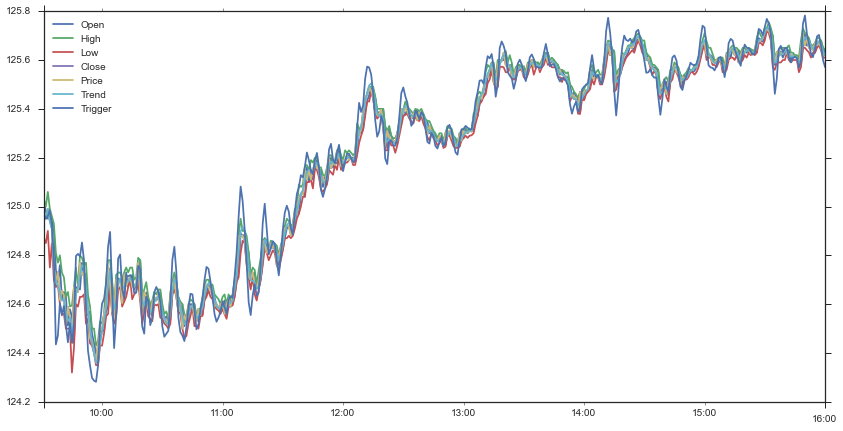

In [24]:
# And plotting is equally straightforward.
df.plot()

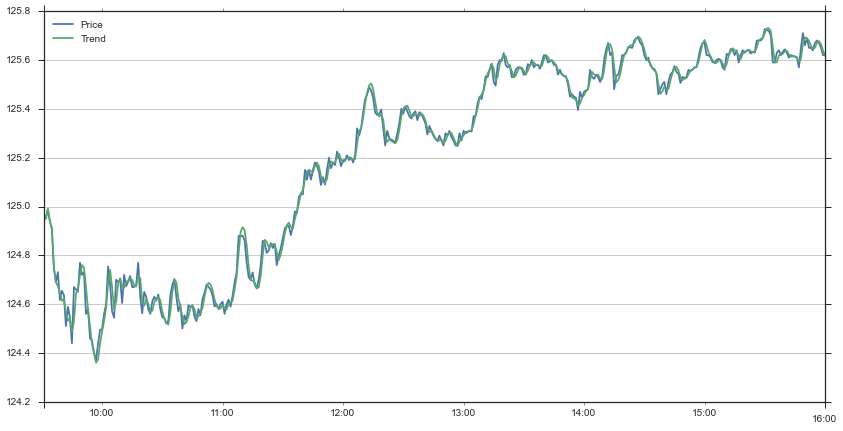

In [25]:
df.ix[:,['Price', 'Trend']].plot(grid=True)

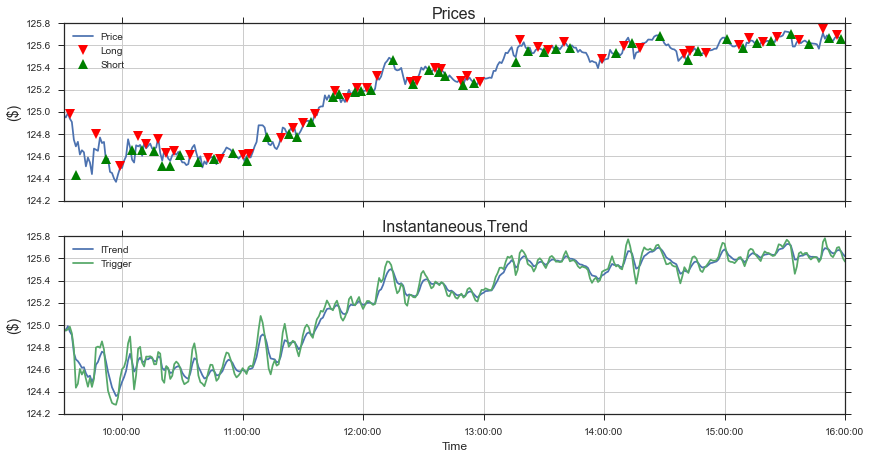

In [26]:
# Now let's try some serious plotting with matplotlib.

# Generate a boolean array to use as index for the events.
long_signal = (df.Trend.shift() > df.Trigger.shift()) & (df.Trend < df.Trigger)
short_signal = (df.Trend.shift() < df.Trigger.shift()) & (df.Trend > df.Trigger)

# This plot will contains two subplos sharing the x axis.
fig, ax = plt.subplots(2, sharex=True)
time = df.index

# The first subplot is the close price and the orders.
ax[0].set_title('Prices', fontsize=16)
ax[0].plot(time, df.Price, label='Price')
ax[0].plot(time[long_signal], df.Trigger[long_signal], linestyle='None', marker='v',
           color='r', markersize=10, label='Long')
ax[0].plot(time[short_signal], df.Trigger[short_signal], linestyle='None', marker='^',
           color='g', markersize=10, label='Short')
ax[0].set_ylabel('($)', fontsize=14)
ax[0].legend(loc='upper left')
ax[0].grid()

# The second subplot are the indicator and the trigger.
ax[1].set_title('Instantaneous Trend', fontsize=16)
ax[1].plot(time, df.Trend, label='ITrend')
ax[1].plot(time, df.Trigger, label='Trigger')
ax[1].set_ylabel('($)', fontsize=14)
ax[1].set_xlabel('Time', fontsize=12)
ax[1].legend(loc='upper left')
ax[1].grid()

In [27]:
# Lets plot some candlesticks
import datetime as dt
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import date2num, DateFormatter

# Here things starts to get a little more challenging, let's define a function.
def plot_candlestick(df):
    df.ix[:,'time'] = date2num(df.index.to_pydatetime())
    df = df[['time', 'Open', 'High', 'Low', 'Close']]
    ohlc = [tuple(x) for x in df.ix[:,:].values]
    bar_width = 1.0 / (len(ohlc) * 10)
    
    fig, ax = plt.subplots()
    ax.set_title('Prices', fontsize=16)
    candlestick_ohlc(ax, ohlc, width=bar_width, colorup='g',
                     colordown='r')
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
    time_min = df.index[0] - dt.timedelta(minutes=10)
    time_max = df.index[-1] + dt.timedelta(minutes=10)
    ax.set_xlim([time_min, time_max])
    ax.set_ylabel('($)', fontsize=14)
    ax.set_xlabel('Time', fontsize=14)
    ax.grid()

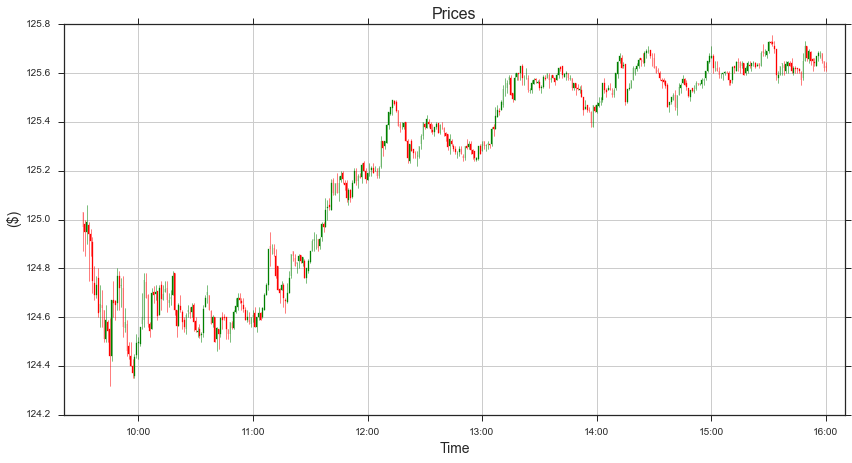

In [28]:
df_ohlc = df.ix[:,0:4]
plot_candlestick(df_ohlc)

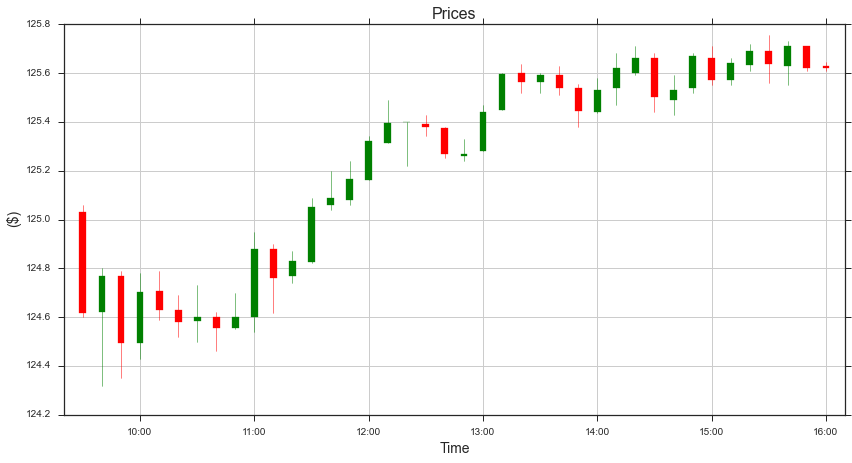

In [29]:
# Let's resampling the data to make the plot is more clear.
# Again, pandas makes everithing easy.
df_ohlc_resampled = df_ohlc.resample('10Min', how={'Open':'first', 'High':max, 'Low':min, 'Close':'last'})
plot_candlestick(df_ohlc_resampled)